# Excersice 1

### Classify vector inputs into two mutually exclusive classes using a densely connected Neural Network.


### IMDB datasets, Keras.

In [1]:
from keras.datasets import imdb
import numpy as np

### Introduction

The exercise was taken from the book Deep Learning With Python, written by Francois Chollet. 

This is a simple two-class classification problem, learning how to classify movie reviews as positive or negative based on the content of the review.

##### Dataset Details:
    1) 50,000 higly polarized reviews;
    2) Split in 25,000 reviews for training and 25,000 reviews for testing;
    3) Each set consist in 50% negative reviews and 50% positive reviews;
    
##### We are going to create new variables where:
    
    1) train_data and train_labels will be used to train the model;
    2) test_data test_lables will be used to test how good is the model in classify un-known attributes;
    3) train_data and test_data are a list of reviews, each review is a list of word indices;
    4) train_labels and test_labels are list of 0s and 1s where 0 = negative and 1 = positive;
    

In [2]:
# splitting the IMDB dataset in Training test e and test set.
# num_words == we will keep only the most 10,000 used words, discarding rare words to decrease the vectors' size.

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
train_labels.shape

(25000,)

### What now ?  - Preparing Data
Now that we have our variables, we have to prepare them to feed the Neural Networks. Neural Networks infact aren't able to digest lists but we need tensors, so we need to turn these lists into tensors. But before starting it is better to mention and understand what a tensor is.

#### What is a tensor ? 

A tensor is a container for data, generally numerical data. To properly understand what a tensor is, it may help that matrices are 2D tensors: tensors are a generalization of matrices to an arbitrary number of dimensions.

    0D Tensor ==> Scalar
    1D Tensor ==> Vector
    2D Tensor ==> Matrices
    3D Tensor ==> Vector of Matrices
    4D Tensor ==> A Vector of Matrices vectors

##### Tensors' Key Attribute

    1) Number of axes(rank): A matrix has 2 axes, while a 3D tensor has 3 axes.

    2) Shape: tuple of integers that describe how many dimensions the tensor has along each axis. A scalar has an empty shape () while a vector of five elements a shape of (5, ), a 2D tensor a shape of (3, 5) and 3D tensor (3, 3, 5)
    
    3) Data Type: the type of the data contained in the tensor, could be float32 float64 and so on.
    
    
#### Preparing the data

##### Turning variables into tensor

So now we will turn the train_data and test_data variables from an array of list with 1 axis and shape (25000, ) to a tensor with two axes and shape (25000, 10000). Specifically, We will use a one-hot encode to turn our lists in vector of 0s and 1s. Inside these vector we will have 0, if the index of the world is not present within the list, otherwise we will have 1.

Then we have to turn labelss into vectors.



In [5]:
# creating the vectorize_sequences function to turn the train_data values into a tensor.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train.shape

(25000, 10000)

In [7]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [8]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [9]:
# turning labels into vectors

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [11]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

### Feeding the network

Once the data is ready to be fed to the network, it's time to create the network. Here a very simple network is used, with 3 layers and 16 hidden units for the first two and just one hidden unit for the final layer. In the fist two layers we are using 16 hidden units, doing this the model will project the input data into a 16-dimensional representation space and will work on that to learn hints from data. In the final layer we will have just one hidden unit, because we want that the model output is the probability of each investigated review to be 1 ==> positive.

#### Step

1) First we create the model using the command models from the keras module. In this case we are using a sequential model: A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. ( source : https://keras.io/guides/sequential_model/). To do this we use the following command:
    
    model = models.Sequential()
    
2) We create the stack of fully connected (Dense) layers. When we create the layer we have also to specify the activation function. For the first two layers we use the relu function meant to to zero out negative values while we will use a sigmoid function in the last layer, because a sigmoid function squashes arbitrary values into the [0,1] range in which the output can be interpreted as a probability. To do so we use the following commands:

    model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
    model.add(layers.Dense(16, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    

3) At the end we have to set the loss function and the optimizer. In this case because we're facing a binary classification problem and the output is a probability, it's best to use the binary_crossentropy loss. While as optimizer we will use rmsprop. But before we move forward it's best to explain why we need them:
    
loss function: how the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
    
optimizer: the mechanism through which the network will update itself based on the data it sees and its loss function.
    
To do so we use the command compile:

    model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
        
    
    
    
In few words, the  loss function is the signal for the network to understand how good is predicting the value y_pred compared to the known target y. Starting from the value of the loss function the optimizer will works backward computing the new contribution that each parameter had in the loss value.

#### Recapping: 

    1) we start feeding the network with the data
    2) these data are processed by the various layers within the network and network starts learning 
    3) using loss function and an optimizer the network adapts and change the way its learning.
 

In [21]:
from keras import models
from keras import layers

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [24]:
# before we fit the model, we create a validation set, doing this we will be able to monitor the accuracy 
# of the model also in data that has never seen before.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
# here we set the epochs=20, meaning how many iterations the network do to learn and improve its performances.
# while the batch size defines the number of samples that will be propagated through the network. In this case 
# we're say to the model to divide the training set in x batch of 512 elements.

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5372 - accuracy: 0.7930 - val_loss: 0.4114 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3272 - accuracy: 0.8991 - val_loss: 0.3184 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2388 - accuracy: 0.9229 - val_loss: 0.2856 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1854 - accuracy: 0.9415 - val_loss: 0.2743 - val_accuracy: 0.8918
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1510 - accuracy: 0.9512 - val_loss: 0.3081 - val_accuracy: 0.8759
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1249 - accuracy: 0.9616 - val_loss: 0.2869 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1024 - accuracy: 0.9700 - val_loss: 0.3115 - val_accuracy: 0.8807
Epoch 8/20
30

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Conclusion

Now that we have trained the model we will take some minutes to understand what was going on during the learning process. We will plot some metrics like Training loss, Validation loss and Training Accuracy and Validation Accuracy using the matplot module.

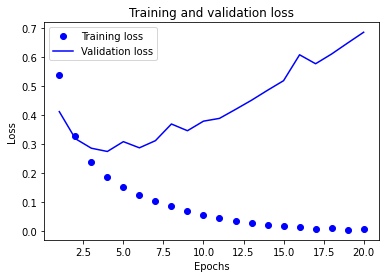

In [27]:
import matplotlib.pyplot as plt


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


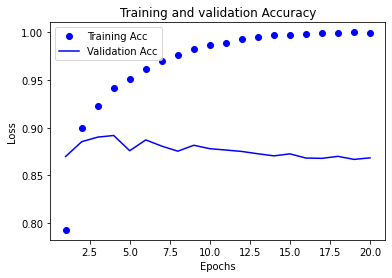

In [28]:
plt.clf()

val_acc = history_dict['val_accuracy']
plt.plot(epochs, accuracy , 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As we can see from the chart Training loss is decreasing iteration after iteration while accuracy is increasing each iteration. The problem is that validation loss and validation accuracy ( the metrics to perform the model on unknown data) after the fourth iteration have a different behaviour. These are clear symptoms of overfitting: the model is very good on predict known data, but not very good on predict unknown data affecting the goodness of the model. 

We will probably se how to solve overfitting in the next exercise.

In [30]:
# evaluating the performance of the model on predicting unknown data.
# we use the test set to check the performance using the accuracy metric.
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.7464 - accuracy: 0.8543


As we can see the model has an accuracy of 85%, this means that it's able to predict correctly the 85% of the reviews.